# **LEVIS Data Engineer Coding Challenge v0.3.0**

## Instructions

 1. Clone this notebook to your home folder.
 1. Solve as many of the problems below as you can within the allowed time frame. Some of the challenges are more advanced than others and are expected to take more time to solve.
 1. Unless otherwise instructed, you can use any programming languages (Python, SQL, Scala, etc.).
 1. You can create as many notebooks as you would like to answer the challenges.
 1. Notebooks should be presentable and should be able to execute successfully with `Run All`.
 1. Once completed, publish your notebook: 
   * Choose the `Publish` item on the `File` menu
 1. Copy the URL(s) of the published notebooks and email them back to your LEVIS contact.

## Tips
- The Databricks Guide (at the top of the Workspace) provides examples of how to use Databricks. You may want to start by reading through it.

### Using SQL in your cells

You can change to native SQL mode in your cells using the `%sql` prefix, demonstrated in the example below. Note that these include visualizations by default.

In [0]:
%sql show tables

database,tableName,isTemporary


### Creating Visualizations from non-SQL Cells

When you need to create a visualization from a cell where you are not writing native SQL, use the `display` function, as demonstrated below.

In [0]:
%scala
val same_query_as_above = sqlContext.sql("show tables")

same_query_as_above: org.apache.spark.sql.DataFrame = [database: string, tableName: string ... 1 more field]

In [0]:
%scala
display(same_query_as_above)

database,tableName,isTemporary


## Challenges
---

### TPC-H Dataset
You're provided with a TPCH data set. The data is located in `/databricks-datasets/tpch/data-001/`. You can see the directory structure below:

In [0]:
%scala
display(dbutils.fs.ls("/databricks-datasets/tpch/data-001/"))

path,name,size,modificationTime
dbfs:/databricks-datasets/tpch/data-001/README.md,README.md,236,1419281876000
dbfs:/databricks-datasets/tpch/data-001/customer/,customer/,0,1676939861052
dbfs:/databricks-datasets/tpch/data-001/lineitem/,lineitem/,0,1676939861052
dbfs:/databricks-datasets/tpch/data-001/nation/,nation/,0,1676939861052
dbfs:/databricks-datasets/tpch/data-001/orders/,orders/,0,1676939861052
dbfs:/databricks-datasets/tpch/data-001/part/,part/,0,1676939861052
dbfs:/databricks-datasets/tpch/data-001/partsupp/,partsupp/,0,1676939861052
dbfs:/databricks-datasets/tpch/data-001/region/,region/,0,1676939861052
dbfs:/databricks-datasets/tpch/data-001/supplier/,supplier/,0,1676939861052


In [0]:
%sh
cat /dbfs/databricks-datasets/tpch/data-001/README.md

TPC-H Generated Dataset

This dataset was generated by Parviz Deyhim <parviz@databricks.com> for the purpose of 
running the TPC-H benchmark, which is described at the following website:
http://www.tpc.org/tpch/


As you can see above, this dataset consists of 8 different folders with different datasets. The schema of each dataset is demonstrated below:

![test](https://www.dropbox.com/s/kqqc36r1hfg8yqe/image_thumb2.png?dl=1)

You can take a quick look at each dataset by running the following Spark command. Feel free to explore and get familiar with this dataset.

In [0]:
%scala
sc.textFile("/databricks-datasets/tpch/data-001/customer/").take(5)

res7: Array[String] = Array(1|Customer#000000001|IVhzIApeRb ot,c,E|15|25-989-741-2988|711.56|BUILDING|to the even, regular platelets. regular, ironic epitaphs nag e|, 2|Customer#000000002|XSTf4,NCwDVaWNe6tEgvwfmRchLXak|13|23-768-687-3665|121.65|AUTOMOBILE|l accounts. blithely ironic theodolites integrate boldly: caref|, 3|Customer#000000003|MG9kdTD2WBHm|1|11-719-748-3364|7498.12|AUTOMOBILE| deposits eat slyly ironic, even instructions. express foxes detect slyly. blithely even accounts abov|, 4|Customer#000000004|XxVSJsLAGtn|4|14-128-190-5944|2866.83|MACHINERY| requests. final, regular ideas sleep final accou|, 5|Customer#000000005|KvpyuHCplrB84WgAiGV6sYpZq7Tj|3|13-750-942-6364|794.47|HOUSEHOLD|n accounts will have to unwind. foxes cajole accor|)

In [0]:
%python 
sc.textFile('dbfs:/databricks-datasets/tpch/data-001/nation/').take(3)

Out[7]: ['0|ALGERIA|0| haggle. carefully final deposits detect slyly agai|',
 '1|ARGENTINA|1|al foxes promise slyly according to the regular accounts. bold requests alon|',
 '2|BRAZIL|1|y alongside of the pending deposits. carefully special packages are about the ironic forges. slyly special |']

#### **Question #1**: Joins in Core Spark
Pick any two datasets and join them using Spark's API. Feel free to pick any two datasets. For example: `PART` and `PARTSUPP`. The goal of this exercise is not to derive anything meaningful out of this data but to demonstrate how to use Spark to join two datasets. For this problem, you're **NOT allowed to use SparkSQL**. You can only use RDD API. You can use either Python or Scala to solve this problem.

In [0]:
%python 

#reading data from text file 
customer = sc.textFile("dbfs:/databricks-datasets/tpch/data-001/customer/").map(lambda x: x.split('|')).map(lambda x: (x[3], x[1]))
nation = sc.textFile("dbfs:/databricks-datasets/tpch/data-001/nation/").map(lambda x: x.split('|'))


joinData = customer.join(nation)
joinData.collect()
# customer.collect()

Out[8]: [('4', ('Customer#000000004', 'EGYPT')),
 ('4', ('Customer#000000054', 'EGYPT')),
 ('4', ('Customer#000000074', 'EGYPT')),
 ('4', ('Customer#000000128', 'EGYPT')),
 ('4', ('Customer#000000132', 'EGYPT')),
 ('4', ('Customer#000000140', 'EGYPT')),
 ('4', ('Customer#000000164', 'EGYPT')),
 ('4', ('Customer#000000179', 'EGYPT')),
 ('4', ('Customer#000000187', 'EGYPT')),
 ('4', ('Customer#000000199', 'EGYPT')),
 ('4', ('Customer#000000218', 'EGYPT')),
 ('4', ('Customer#000000262', 'EGYPT')),
 ('4', ('Customer#000000287', 'EGYPT')),
 ('4', ('Customer#000000290', 'EGYPT')),
 ('4', ('Customer#000000299', 'EGYPT')),
 ('4', ('Customer#000000302', 'EGYPT')),
 ('4', ('Customer#000000334', 'EGYPT')),
 ('4', ('Customer#000000390', 'EGYPT')),
 ('4', ('Customer#000000437', 'EGYPT')),
 ('4', ('Customer#000000449', 'EGYPT')),
 ('4', ('Customer#000000458', 'EGYPT')),
 ('4', ('Customer#000000471', 'EGYPT')),
 ('4', ('Customer#000000489', 'EGYPT')),
 ('4', ('Customer#000000500', 'EGYPT')),
 ('4', (

#### **Question #2**: Joins With Spark SQL
Pick any two datasets and join them using SparkSQL API. Feel free to pick any two datasets. For example, PART and PARTSUPP. The goal of this exercise is not to derive anything meaningful out of this data but to demonstrate how to use Spark to join two datasets. For this problem, you're **NOT allowed to use the RDD API**. You can only use SparkSQL API. You can use either Python or Scala to solve this problem.

In [0]:
%python 


customer_df = spark.read.option('delimiter', '|').csv('dbfs:/databricks-datasets/tpch/data-001/customer/').toDF("custkey", 'name', 'address', 'nationkey', 'phone', 'accbal', 'mkt', 'comment', 'extra')

nation_df = spark.read.option('delimiter', '|').csv('dbfs:/databricks-datasets/tpch/data-001/nation/').toDF('nationkey', 'name', 'region', 'comment', 'extra')


customer_df.alias('c').join(nation_df.alias('n'), on='nationkey', how='inner').show()

+---------+-------+------------------+--------------------+---------------+-------+----------+--------------------+-----+--------------+------+--------------------+-----+
|nationkey|custkey|              name|             address|          phone| accbal|       mkt|             comment|extra|          name|region|             comment|extra|
+---------+-------+------------------+--------------------+---------------+-------+----------+--------------------+-----+--------------+------+--------------------+-----+
|       15|      1|Customer#000000001|   IVhzIApeRb ot,c,E|25-989-741-2988| 711.56|  BUILDING|to the even, regu...| null|       MOROCCO|     0|rns. blithely bol...| null|
|       13|      2|Customer#000000002|XSTf4,NCwDVaWNe6t...|23-768-687-3665| 121.65|AUTOMOBILE|l accounts. blith...| null|        JORDAN|     4|ic deposits are b...| null|
|        1|      3|Customer#000000003|        MG9kdTD2WBHm|11-719-748-3364|7498.12|AUTOMOBILE| deposits eat sly...| null|     ARGENTINA|     1|al

#### **Question #3**: Alternate Data Formats
The given dataset above is in raw text storage format. What other data storage format can you suggest optimizing the performance of our Spark workload if we were to frequently scan and read this dataset. Please come up with a code example and explain why you decide to go with this approach. Please note that there's no completely correct answer here. We're interested to hear your thoughts and see the implementation details.

One of the best storage format for data to optimize the performance of Spark workload would be  Parquet file format. Parquet is an open source, column-oriented data file format designed for efficient data storage and retrieval. It provides efficient data compression and encoding schemes with enhanced performance to handle complex data in bulk. some benefits of parquet format is that it can store any type of data like structure data, unstructure data. 

Also, if we need more function over parquet file such as transaction handling, merges of data, easy update we can move to delta lake format.

In [0]:
%sh 
rm -R /dbfs/tmp/customer

In [0]:
%python

#reading text format data
customer_df = spark.read.option('delimiter', '|').csv('dbfs:/databricks-datasets/tpch/data-001/customer/').toDF("custkey", 'name', 'address', 'nationkey', 'phone', 'accbal', 'mkt', 'comment', 'extra')

#writing data as parquet.
customer_df.write.parquet('/tmp/customer')


In [0]:
%python
dbutils.fs.ls('/tmp/customer/')

Out[19]: [FileInfo(path='dbfs:/tmp/customer/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1676940149000),
 FileInfo(path='dbfs:/tmp/customer/_committed_6272901408755799484', name='_committed_6272901408755799484', size=424, modificationTime=1676940149000),
 FileInfo(path='dbfs:/tmp/customer/_started_6272901408755799484', name='_started_6272901408755799484', size=0, modificationTime=1676940143000),
 FileInfo(path='dbfs:/tmp/customer/part-00000-tid-6272901408755799484-a626888e-3294-4304-a3e0-e277e4e016cd-363-1-c000.snappy.parquet', name='part-00000-tid-6272901408755799484-a626888e-3294-4304-a3e0-e277e4e016cd-363-1-c000.snappy.parquet', size=16498094, modificationTime=1676940149000),
 FileInfo(path='dbfs:/tmp/customer/part-00001-tid-6272901408755799484-a626888e-3294-4304-a3e0-e277e4e016cd-364-1-c000.snappy.parquet', name='part-00001-tid-6272901408755799484-a626888e-3294-4304-a3e0-e277e4e016cd-364-1-c000.snappy.parquet', size=16432906, modificationTime=1676940148000),
 FileInfo(path=

### Baby Names Dataset

This dataset comes from a website referenced by [Data.gov](http://catalog.data.gov/dataset/baby-names-beginning-2007). It lists baby names used in the state of NY from 2007 to 2012.

The following cells run commands that copy this file to the cluster.

In [0]:
%fs rm dbfs:/tmp/rows.json

res8: Boolean = true

In [0]:
%scala
import java.net.URL
import java.io.File
import org.apache.commons.io.FileUtils

val tmpFile = new File("/tmp/rows.json")
FileUtils.copyURLToFile(new URL("https://health.data.ny.gov/api/views/jxy9-yhdk/rows.json?accessType=DOWNLOAD"), tmpFile)

import java.net.URL
import java.io.File
import org.apache.commons.io.FileUtils
tmpFile: java.io.File = /tmp/rows.json

In [0]:
%fs mv file:/tmp/rows.json dbfs:/tmp/rows.json

res10: Boolean = true

In [0]:
%fs head dbfs:/tmp/rows.json

[Truncated to first 65536 bytes]
{
 "meta" : {
 "view" : {
 "id" : "jxy9-yhdk",
 "name" : "Baby Names: Beginning 2007",
 "assetType" : "dataset",
 "attribution" : "New York State Department of Health",
 "attributionLink" : "http://www.health.ny.gov/statistics/vital_statistics/",
 "averageRating" : 0,
 "category" : "Health",
 "createdAt" : 1356724562,
 "description" : "New York State Baby Names are aggregated and displayed by the year, county, or borough where the mother resided as stated on a New York State or New York City (NYC) birth certificate. The frequency of the baby name is listed if there are 5 or more of the same baby name in a county outside of NYC or 10 or more of the same baby name in a NYC borough.",
 "displayType" : "table",
 "downloadCount" : 83364,
 "hideFromCatalog" : false,
 "hideFromDataJson" : false,
 "indexUpdatedAt" : 1527713966,
 "newBackend" : true,
 "numberOfComments" : 0,
 "oid" : 28927042,
 "provenance" : "official",
 "publicationAppendEnabled" : false,
 "publicationDate" : 1527713207,
 "publicationGroup" : 583607,
 "publicationStage" : "published",
 "rowClass" : "",
 "rowsUpdatedAt" : 1675358952,
 "rowsUpdatedBy" : "a9xd-f5um",
 "tableId" : 15236047,
 "totalTimesRated" : 0,
 "viewCount" : 76719,
 "viewLastModified" : 1675358951,
 "viewType" : "tabular",
 "approvals" : [ {
 "reviewedAt" : 1527713207,
 "reviewedAutomatically" : true,
 "state" : "approved",
 "submissionId" : 582096,
 "submissionObject" : "public_audience_request",
 "submissionOutcome" : "change_audience",
 "submittedAt" : 1527713207,
 "workflowId" : 1966,
 "submissionDetails" : {
 "permissionType" : "READ"
 },
 "submissionOutcomeApplication" : {
 "failureCount" : 0,
 "status" : "success"
 },
 "submitter" : {
 "id" : "s9j2-nqmr",
 "displayName" : "Open Data NY - DOH"
 }
 } ],
 "clientContext" : {
 "clientContextVariables" : [ ],
 "inheritedVariables" : { }
 },
 "columns" : [ {
 "id" : -1,
 "name" : "sid",
 "dataTypeName" : "meta_data",
 "fieldName" : ":sid",
 "position" : 0,
 "renderTypeName" : "meta_data",
 "format" : { },
 "flags" : [ "hidden" ]
 }, {
 "id" : -1,
 "name" : "id",
 "dataTypeName" : "meta_data",
 "fieldName" : ":id",
 "position" : 0,
 "renderTypeName" : "meta_data",
 "format" : { },
 "flags" : [ "hidden" ]
 }, {
 "id" : -1,
 "name" : "position",
 "dataTypeName" : "meta_data",
 "fieldName" : ":position",
 "position" : 0,
 "renderTypeName" : "meta_data",
 "format" : { },
 "flags" : [ "hidden" ]
 }, {
 "id" : -1,
 "name" : "created_at",
 "dataTypeName" : "meta_data",
 "fieldName" : ":created_at",
 "position" : 0,
 "renderTypeName" : "meta_data",
 "format" : { },
 "flags" : [ "hidden" ]
 }, {
 "id" : -1,
 "name" : "created_meta",
 "dataTypeName" : "meta_data",
 "fieldName" : ":created_meta",
 "position" : 0,
 "renderTypeName" : "meta_data",
 "format" : { },
 "flags" : [ "hidden" ]
 }, {
 "id" : -1,
 "name" : "updated_at",
 "dataTypeName" : "meta_data",
 "fieldName" : ":updated_at",
 "position" : 0,
 "renderTypeName" : "meta_data",
 "format" : { },
 "flags" : [ "hidden" ]
 }, {
 "id" : -1,
 "name" : "updated_meta",
 "dataTypeName" : "meta_data",
 "fieldName" : ":updated_meta",
 "position" : 0,
 "renderTypeName" : "meta_data",
 "format" : { },
 "flags" : [ "hidden" ]
 }, {
 "id" : -1,
 "name" : "meta",
 "dataTypeName" : "meta_data",
 "fieldName" : ":meta",
 "position" : 0,
 "renderTypeName" : "meta_data",
 "format" : { },
 "flags" : [ "hidden" ]
 }, {
 "id" : 361599813,
 "name" : "Year",
 "dataTypeName" : "number",
 "description" : "Year data was collected",
 "fieldName" : "year",
 "position" : 1,
 "renderTypeName" : "number",
 "tableColumnId" : 6477901,
 "width" : 89,
 "cachedContents" : {
 "largest" : "2020",
 "non_null" : "87899",
 "average" : "2014.408819158422",
 "null" : "0",
 "top" : [ {
 "item" : "2014",
 "count" : "8362"
 }, {
 "item" : "2008",
 "count" : "6481"
 }, {
 "item" : "2007",
 "count" : "6367"
 }, {
 "item" : "2009",
 "count" : "6312"
 }, {
 "item" : "2011",
 "count" : "6216"
 }, {
 "item" : "2010",
 "count

#### **Question #1**: Spark SQL's Native JSON Support
Use Spark SQL's native JSON support to create a temp table you can use to query the data (you'll use the `registerTempTable` operation). Show a simple sample query.

In [0]:
%sql
DROP TABLE IF EXISTS BabyNameTemp;
CREATE TEMPORARY TABLE BabyNameTemp
USING org.apache.spark.sql.json
OPTIONS (
    path = 'dbfs:/tmp/rows.json',
    multiLine = true
);

In [0]:
%python
BabyNameDF = spark.sql("select * from BabyNameTemp")
display(BabyNameDF.show())

+--------------------+--------------------+
|                data|                meta|
+--------------------+--------------------+
|[[row-brkm-7izk-t...|{{[{1527713207, t...|
+--------------------+--------------------+



#### **Question #2**: Working with Nested Data
What does the nested schema of this dataset look like? How can you bring these nested fields up to the top level in a DataFrame?

In [0]:
%python
display(BabyNameDF.printSchema())

root
 |-- data: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- meta: struct (nullable = true)
 |    |-- view: struct (nullable = true)
 |    |    |-- approvals: array (nullable = true)
 |    |    |    |-- element: struct (containsNull = true)
 |    |    |    |    |-- reviewedAt: long (nullable = true)
 |    |    |    |    |-- reviewedAutomatically: boolean (nullable = true)
 |    |    |    |    |-- state: string (nullable = true)
 |    |    |    |    |-- submissionDetails: struct (nullable = true)
 |    |    |    |    |    |-- permissionType: string (nullable = true)
 |    |    |    |    |-- submissionId: long (nullable = true)
 |    |    |    |    |-- submissionObject: string (nullable = true)
 |    |    |    |    |-- submissionOutcome: string (nullable = true)
 |    |    |    |    |-- submissionOutcomeApplication: struct (nullable = true)
 |    |    |    |    |    |-- failureCount: long (nullable = true

The data has two node "data" and "meta" under the root node.

Data Node: This node contains the data of the file. The data are in array of array format.  
Meta Node: This node contains the information about the data, also know as metadata. The data are arranged in nest json format.

Different ways to get the nested fields up to top level.
1. When working with sql, we can use "." dot notation to get the data within the nested level in case of json data. In case of array we can use `explode` or `flatten` function to get to top level of nested data.
2. When working with python, we can use `get_json_object` to get the data within the nested json data and use `explode` and `flatten` funtion to work with nested array of data.

In [0]:
%python
#reading column Name from meta json fields
ColumnsName = spark.sql('select p.meta.view.columns.name from BabyNameTemp p').collect()[0].name

In [0]:
%python

#getting the data ready.

# reading schema of the data
from pyspark.sql.types import StructType, StructField, StringType
import json

# Define the schema based on the metadata in the JSON file
fields = StructType([
    StructField(field, StringType()) for field in ColumnsName
])

#show
fields

Out[23]: StructType([StructField('sid', StringType(), True), StructField('id', StringType(), True), StructField('position', StringType(), True), StructField('created_at', StringType(), True), StructField('created_meta', StringType(), True), StructField('updated_at', StringType(), True), StructField('updated_meta', StringType(), True), StructField('meta', StringType(), True), StructField('Year', StringType(), True), StructField('First Name', StringType(), True), StructField('County', StringType(), True), StructField('Sex', StringType(), True), StructField('Count', StringType(), True)])

In [0]:
%python
BabyNameDF = spark.sql("select data from BabyNameTemp")

In [0]:
%python

BabyNamesData = spark.createDataFrame(data = BabyNameDF.collect()[0].data, schema=fields)
BabyNamesData.createOrReplaceTempView('BabyNamesData')
BabyNamesData.show()

+------------------+--------------------+--------+----------+------------+----------+------------+----+----+----------+------+---+-----+
|               sid|                  id|position|created_at|created_meta|updated_at|updated_meta|meta|Year|First Name|County|Sex|Count|
+------------------+--------------------+--------+----------+------------+----------+------------+----+----+----------+------+---+-----+
|row-brkm-7izk-trjm|00000000-0000-000...|       0|1611674742|        null|1611674742|        null| { }|2018|    OLIVIA|Albany|  F|   17|
|row-2m5x_rpr2.gwvc|00000000-0000-000...|       0|1611674742|        null|1611674742|        null| { }|2018|       AVA|Albany|  F|   17|
|row-xcx9~hw65_ib5p|00000000-0000-000...|       0|1611674742|        null|1611674742|        null| { }|2018|  ISABELLA|Albany|  F|   15|
|row-684m~4agu.tevb|00000000-0000-000...|       0|1611674742|        null|1611674742|        null| { }|2018|      EMMA|Albany|  F|   14|
|row-jgz3~57z7_bxvk|00000000-0000-000...|

In [0]:
%sql
select distinct county, count from BabyNamesData order by county

county,count
ALBANY,9
ALBANY,29
ALBANY,23
ALBANY,24
ALBANY,5
ALBANY,12
ALBANY,13
ALBANY,16
ALBANY,22
ALBANY,10


#### **Question #3**: Analyzing the Data

Using the tables you created, create a simple visualization that shows what is the most popular first letters baby names to start with each year.

In [0]:
%sql
with BabyNameFirstLetter as 
(
  select lower(left(b.`First Name`, 1)) as firstLetter, b.Year, b.count
  from BabyNamesData b
), 

LetterCountYear as (
select  b.firstLetter, sum(b.count) as CountLetter, b.Year
from BabyNameFirstLetter b
group by b.firstLetter, b.Year
),  

FinalResult as  (
select firstLetter, CountLetter, Year, Dense_rank() over(partition by Year order by CountLetter desc) Rn
from LetterCountYear
)

select * from FinalResult where Rn = 1
order by Year

firstLetter,CountLetter,Year,Rn
j,18573.0,2007,1
j,18301.0,2008,1
a,17361.0,2009,1
a,17097.0,2010,1
a,17132.0,2011,1
a,16727.0,2012,1
a,16424.0,2013,1
a,18833.0,2014,1
a,16705.0,2015,1
a,16557.0,2016,1


Output can only be rendered in Databricks

### Log Processing

The following data comes from the _Learning Spark_ book.

In [0]:
%scala
display(dbutils.fs.ls("/databricks-datasets/learning-spark/data-001/fake_logs"))

path,name,size,modificationTime
dbfs:/databricks-datasets/learning-spark/data-001/fake_logs/log1.log,log1.log,958,1418341602000
dbfs:/databricks-datasets/learning-spark/data-001/fake_logs/log2.log,log2.log,193,1418341602000


In [0]:
%scala
println(dbutils.fs.head("/databricks-datasets/learning-spark/data-001/fake_logs/log1.log"))

66.249.69.97 - - [24/Sep/2014:22:25:44 +0000] "GET /071300/242153 HTTP/1.1" 404 514 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"
71.19.157.174 - - [24/Sep/2014:22:26:12 +0000] "GET /error HTTP/1.1" 404 505 "-" "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36"
71.19.157.174 - - [24/Sep/2014:22:26:12 +0000] "GET /favicon.ico HTTP/1.1" 200 1713 "-" "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36"
71.19.157.174 - - [24/Sep/2014:22:26:37 +0000] "GET / HTTP/1.1" 200 18785 "-" "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36"
71.19.157.174 - - [24/Sep/2014:22:26:37 +0000] "GET /jobmineimg.php?q=m HTTP/1.1" 200 222 "http://www.holdenkarau.com/" "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36"

In [0]:
%sh
cat /dbfs/databricks-datasets/learning-spark/data-001/fake_logs/log2.log

71.19.157.174 - - [24/Sep/2014:22:26:12 +0000] "GET /error78978 HTTP/1.1" 404 505 "-" "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36"


#### **Question #1**: Parsing Logs
Parse the logs into a DataFrame/Spark SQL table that can be queried. This should be done using the Dataset API.

In [0]:
%python

from pyspark.sql.functions import split, regexp_extract
from pyspark.sql.types import StringType, IntegerType


#define schema for the log file.
schema = StructType([
    StructField("request", StringType(), True),
    StructField("ipAddress", StringType(), True),
    StructField("dateTime", StringType(), True),
    StructField("status", IntegerType(), True),
    StructField("referrer", StringType(), True),
    StructField("userAgent", StringType(), True)
])

#read the log file
logDf = spark.read.text("/databricks-datasets/learning-spark/data-001/fake_logs/")


logDf = logDf.select(
  regexp_extract('value', r'"(.*?)"', 1).alias('request'),
  regexp_extract('value', r'^([^\s]+)', 1).alias('ipAddress'),
  regexp_extract('value', r'\[(.*?)\]', 1).alias('dateTime'),
  regexp_extract('value', r'\s(\d{3})\s', 1).cast(IntegerType()).alias('status'),
  split(regexp_extract('value', r'"([^"]*)"', 1), ' ').getItem(0).alias('referrer'),
  split(regexp_extract('value', r'"([^"]*)"', 1), ' ').getItem(2).alias('userAgent')
)


logDf.count()

  
  

Out[27]: 6

#### **Question #2**: Analysis
Generate some insights from the log data.

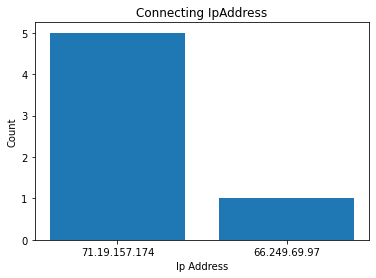

In [0]:
%python 

import matplotlib.pyplot as plt
# count the number of times each status code appears
statusCounts = logDf.groupBy("ipAddress").count()
statusCount_pd = statusCounts.toPandas()

plt.bar(statusCount_pd["ipAddress"], statusCount_pd["count"])
plt.xlabel("Ip Address")
plt.ylabel("Count")
plt.title("Connecting IpAddress")
plt.show()

### CSV Parsing
The following examples involve working with simple CSV data.

#### **Question #1**: CSV Header Rows
Given the simple RDD `full_csv` below, write the most efficient Spark job you can to remove the header row.

In [0]:
%scala
val full_csv = sc.parallelize(Array(
  "col_1, col_2, col_3",
  "1, ABC, Foo1",
  "2, ABCD, Foo2",
  "3, ABCDE, Foo3",
  "4, ABCDEF, Foo4",
  "5, DEF, Foo5",
  "6, DEFGHI, Foo6",
  "7, GHI, Foo7",
  "8, GHIJKL, Foo8",
  "9, JKLMNO, Foo9",
  "10, MNO, Foo10",
))
  

full_csv: org.apache.spark.rdd.RDD[String] = ParallelCollectionRDD[1101] at parallelize at command-944986760293373:1

In [0]:
%python 
# chaning the code to python 
full_csv = sc.parallelize([
  "col_1, col_2, col_3",
  "1, ABC, Foo1",
  "2, ABCD, Foo2",
  "3, ABCDE, Foo3",
  "4, ABCDEF, Foo4",
  "5, DEF, Foo5",
  "6, DEFGHI, Foo6",
  "7, GHI, Foo7",
  "8, GHIJKL, Foo8",
  "9, JKLMNO, Foo9",
  "10, MNO, Foo10",
])

full_csv_no_header = full_csv.zipWithIndex().filter(lambda x: x[1] > 0).map(lambda x: x[0])
full_csv_no_header.collect()

Out[29]: ['1, ABC, Foo1',
 '2, ABCD, Foo2',
 '3, ABCDE, Foo3',
 '4, ABCDEF, Foo4',
 '5, DEF, Foo5',
 '6, DEFGHI, Foo6',
 '7, GHI, Foo7',
 '8, GHIJKL, Foo8',
 '9, JKLMNO, Foo9',
 '10, MNO, Foo10']

#### Question #2 DataFrame UDFs and DataFrame SparkSQL Functions

Below we've created a small DataFrame. You should use DataFrame API functions and UDFs to accomplish two tasks.

1. You need to parse the State and city into two different columns.
2. You need to get the number of days in between the start and end dates. You need to do this two ways.
  - Firstly, you should use SparkSQL functions to get this date difference.
  - Secondly, you should write a udf that gets the number of days between the end date and the start date.

In [0]:
%python

from pyspark.sql import functions as F
from pyspark.sql.types import *

# Build an example DataFrame dataset to work with. 
dbutils.fs.rm("/tmp/dataframe_sample.csv", True)
dbutils.fs.put("/tmp/dataframe_sample.csv", """id|end_date|start_date|location
1|2015-10-14 00:00:00|2015-09-14 00:00:00|CA-SF
2|2015-10-15 01:00:20|2015-08-14 00:00:00|CA-SD
3|2015-10-16 02:30:00|2015-01-14 00:00:00|NY-NY
4|2015-10-17 03:00:20|2015-02-14 00:00:00|NY-NY
5|2015-10-18 04:30:00|2014-04-14 00:00:00|CA-SD
""", True)

formatPackage = "csv" if sc.version > '1.6' else "com.databricks.spark.csv"
df = sqlContext.read.format(formatPackage).options(
  header='true', 
  delimiter = '|',
).load("/tmp/dataframe_sample.csv")
df.printSchema()

Wrote 272 bytes.
root
 |-- id: string (nullable = true)
 |-- end_date: string (nullable = true)
 |-- start_date: string (nullable = true)
 |-- location: string (nullable = true)



In [0]:
%python
split_col = F.split(df['location'], '-')
df = df.withColumn('State', split_col.getItem(0))
df = df.withColumn('city', split_col.getItem(1))
df.show()

+---+-------------------+-------------------+--------+-----+----+
| id|           end_date|         start_date|location|State|city|
+---+-------------------+-------------------+--------+-----+----+
|  1|2015-10-14 00:00:00|2015-09-14 00:00:00|   CA-SF|   CA|  SF|
|  2|2015-10-15 01:00:20|2015-08-14 00:00:00|   CA-SD|   CA|  SD|
|  3|2015-10-16 02:30:00|2015-01-14 00:00:00|   NY-NY|   NY|  NY|
|  4|2015-10-17 03:00:20|2015-02-14 00:00:00|   NY-NY|   NY|  NY|
|  5|2015-10-18 04:30:00|2014-04-14 00:00:00|   CA-SD|   CA|  SD|
+---+-------------------+-------------------+--------+-----+----+



In [0]:
%python 
from datetime import datetime
# define a function to calculate the date difference using datetime
def date_diff(start, end):
    return (end - start).days
  
# get date difference using SparkSQL functions
df = df.withColumn('start_date', F.to_date(df['start_date']))
df = df.withColumn('end_date', F.to_date(df['end_date']))
df = df.withColumn('date_diff_sql', F.datediff(df['end_date'], df['start_date']))


# get date difference using UDF
date_diff_udf = F.udf(date_diff, IntegerType())
df = df.withColumn('date_diff_udf', date_diff_udf(df['start_date'], df['end_date']))

df.show()

+---+----------+----------+--------+-----+----+-------------+-------------+
| id|  end_date|start_date|location|State|city|date_diff_sql|date_diff_udf|
+---+----------+----------+--------+-----+----+-------------+-------------+
|  1|2015-10-14|2015-09-14|   CA-SF|   CA|  SF|           30|           30|
|  2|2015-10-15|2015-08-14|   CA-SD|   CA|  SD|           62|           62|
|  3|2015-10-16|2015-01-14|   NY-NY|   NY|  NY|          275|          275|
|  4|2015-10-17|2015-02-14|   NY-NY|   NY|  NY|          245|          245|
|  5|2015-10-18|2014-04-14|   CA-SD|   CA|  SD|          552|          552|
+---+----------+----------+--------+-----+----+-------------+-------------+



### Readability

Write a readable, testable, and maintainable code.

#### Question #1 SQL Readability and Performances
Please rewrite the 'ugly' SQL below to improve the **readability** and **performance**. Please make commentsc in code about how your changes improved the SQL performance.

select * from (
    select 'a' as region, 'europe' as affiliate, t1.variant_code as channel, t1.customer_key, t3.b_description as brand, t3.c_description as consumer, t3.p_category as category, t4.fmonth as fisc_month, t4.fweek as fisc_week, t1.item_timestamp as fisc_date, sum(t1.shipped_units) as shipment_units
    from ds_lsa.shipment_info as t1, ds_lsa.product_info as t3, ds_lsa.dayconversion as t4
    where t1.p_key = t3.product and try_cast(t1.item_timestamp as integer) = t4.day
    group by variant_code, customer_key, b_description, c_description, p_category, fmonth, fweek, item_timestamp
    order by variant_code, customer_key, b_description, c_description, p_category, fmonth, fweek, item_timestamp
)

In [0]:
%sql

/*
  Tracking changes in SQL
  - Changing cross join to Left outer join
  - Adding alias to group by and order by clauses
*/

SELECT   
    'a'                   AS region,
    'europe'              AS affiliate,
    t1.variant_code       AS channel,
    t1.customer_key       AS customer_key,
    t3.b_description      AS brand,
    t3.c_description      AS consumer,
    t3.p_category         AS category,
    t4.fmonth             AS fisc_month,
    t4.fweek              AS fisc_week,
    t1.item_timestamp     AS fisc_date,
    Sum(t1.shipped_units) AS shipment_units
FROM ds_lsa.shipment_info  AS t1
    LEFT OUTER JOIN ds_lsa.product_info   AS t3 ON t1.p_key = t3.product
    LEFT OUTER JOIN ds_lsa.dayconversion  AS t4 ON try_cast(t1.item_timestamp as integer) = t4.day
GROUP BY t1.variant_code,
        t1.customer_key,
        t3.b_description,
        t3.c_description,
        t3.p_category,
        t4.fmonth,
        t4.fweek,
        t4.item_timestamp
ORDER BY t1.variant_code,
        t1.customer_key,
        t3.b_description,
        t3.c_description,
        t3.p_category,
        t4.fmonth,
        t4.fweek,
        t4.item_timestamp 

com.databricks.backend.common.rpc.SparkDriverExceptions$SQLExecutionException: org.apache.spark.sql.AnalysisException: Table or view not found: ds_lsa.shipment_info; line 19 pos 5;
'Sort ['t1.variant_code ASC NULLS FIRST, 't1.customer_key ASC NULLS FIRST, 't3.b_description ASC NULLS FIRST, 't3.c_description ASC NULLS FIRST, 't3.p_category ASC NULLS FIRST, 't4.fmonth ASC NULLS FIRST, 't4.fweek ASC NULLS FIRST, 't4.item_timestamp ASC NULLS FIRST], true
+- 'Aggregate ['t1.variant_code, 't1.customer_key, 't3.b_description, 't3.c_description, 't3.p_category, 't4.fmonth, 't4.fweek, 't4.item_timestamp], [a AS region#5617, europe AS affiliate#5618, 't1.variant_code AS channel#5619, 't1.customer_key AS customer_key#5620, 't3.b_description AS brand#5621, 't3.c_description AS consumer#5622, 't3.p_category AS category#5623, 't4.fmonth AS fisc_month#5624, 't4.fweek AS fisc_week#5625, 't1.item_timestamp AS fisc_date#5626, 'Sum('t1.shipped_units) AS shipment_units#5627]
 +- 'Join LeftOuter, (try_cast('t1.item_timestamp as int) = 't4.day)
 :- 'Join LeftOuter, ('t1.p_key = 't3.product)
 : :- 'SubqueryAlias t1
 : : +- 'UnresolvedRelation [ds_lsa, shipment_info], [], false
 : +- 'SubqueryAlias t3
 : +- 'UnresolvedRelation [ds_lsa, product_info], [], false
 +- 'SubqueryAlias t4
 +- 'UnresolvedRelation [ds_lsa, dayconversion], [], false

	at org.apache.spark.sql.catalyst.analysis.package$AnalysisErrorAt.failAnalysis(package.scala:45)
	at org.apache.spark.sql.catalyst.analysis.CheckAnalysis.$anonfun$checkAnalysis$2(CheckAnalysis.scala:158)
	at org.apache.spark.sql.catalyst.analysis.CheckAnalysis.$anonfun$checkAnalysis$2$adapted(CheckAnalysis.scala:125)
	at org.apache.spark.sql.catalyst.trees.TreeNode.foreachUp(TreeNode.scala:295)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$foreachUp$1(TreeNode.scala:294)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$foreachUp$1$adapted(TreeNode.scala:294)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.IterableLike.foreach(IterableLike.scala:74)
	at scala.collection.IterableLike.foreach$(IterableLike.scala:73)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:56)
	at org.apache.spark.sql.catalyst.trees.TreeNode.foreachUp(TreeNode.scala:294)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$foreachUp$1(TreeNode.scala:294)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$foreachUp$1$adapted(TreeNode.scala:294)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.IterableLike.foreach(IterableLike.scala:74)
	at scala.collection.IterableLike.foreach$(IterableLike.scala:73)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:56)
	at org.apache.spark.sql.catalyst.trees.TreeNode.foreachUp(TreeNode.scala:294)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$foreachUp$1(TreeNode.scala:294)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$foreachUp$1$adapted(TreeNode.scala:294)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.IterableLike.foreach(IterableLike.scala:74)
	at scala.collection.IterableLike.foreach$(IterableLike.scala:73)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:56)
	at org.apache.spark.sql.catalyst.trees.TreeNode.foreachUp(TreeNode.scala:294)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$foreachUp$1(TreeNode.scala:294)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$foreachUp$1$adapted(TreeNode.scala:294)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collec

#### **Question #2 Python Readability and Performances**

Please rewrite the 'ugly' python below to improve the **readability**, **maintainability**, and **testability**. **No need to run the code to have a result.**
Please make comments in code about how your changes improved the performance.

In [0]:
%python

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# -*- coding: utf-8 -*-
import dataiku
from dataiku import spark as dkuspark
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.functions import coalesce

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# Read recipe inputs
retail_Elasticities_byCountry = dataiku.Dataset("Retail_Elasticities_byCountry")
retail_Elasticities_byCountry_df = dkuspark.get_dataframe(sqlContext, retail_Elasticities_byCountry)
retail_Elasticities_LSE = dataiku.Dataset("Retail_Elasticities_LSE")
retail_Elasticities_LSE_df = dkuspark.get_dataframe(sqlContext, retail_Elasticities_LSE)

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# ecomm_orders_elasticity_LSE = ecomm_orders_elasticity_LSE.rename(columns={'elasticity' : 'elasticity_LSE', 'intercept' : 'intercept_LSE', 'selected_level' : 'selected_level_LSE'})

retail_Elasticities_LSE_df = (retail_Elasticities_LSE_df
                                            .withColumnRenamed("elasticity","elasticity_LSE")
                                            .withColumnRenamed("intercept","intercept_LSE")
                                            .withColumnRenamed("selected_level","selected_level_LSE")
                                           )

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
retail_Elasticities_LSE_df = retail_Elasticities_LSE_df.select('PRODUCT',
                       'elasticity_LSE',
                       'intercept_LSE',
                       'selected_level_LSE',
                       )

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# change column names in order to avoid ambiguous issues
retail_Elasticities_LSE_df = (retail_Elasticities_LSE_df
                              .withColumnRenamed("PRODUCT","PRODUCT_lse")
                             )

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# df_merge = (ecomm_orders_elasticity_byCountry
#  .merge(ecomm_orders_elasticity_LSE[['PRODUCT','elasticity_LSE', 'intercept_LSE', 'selected_level_LSE']], how = 'left', on = ['PRODUCT']))
df_merge = retail_Elasticities_byCountry_df.join(
    retail_Elasticities_LSE_df,
    (retail_Elasticities_byCountry_df['PRODUCT'] == retail_Elasticities_LSE_df['PRODUCT_lse']),
    how='left')

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
columns_to_drop = [
    'PRODUCT_lse'
]

df_merge = df_merge.drop(*columns_to_drop)

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# df_merge['selected_elasticity'] = (df_merge['elasticity']
#                                      .fillna(df_merge['elasticity_LSE']))


df_merge = df_merge.withColumn('selected_elasticity', coalesce('elasticity', 'elasticity_LSE'))

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# df_merge['selected_intercept'] = (df_merge['intercept']
#                                      .fillna(df_merge['intercept_LSE']))
df_merge = df_merge.withColumn('selected_intercept', coalesce('intercept', 'intercept_LSE'))

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# df_merge['selected_level'] = df_merge['selected_level'].replace('No Curve', np.nan)
new_df = df_merge.select('selected_level').replace('No Curve', None)

new_column_udf = udf(lambda selected_level: None if selected_level == "No Curve" else selected_level, StringType())

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
df_merge = df_merge.withColumn("selected_level", new_column_udf(df_merge.selected_level))

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
#df_merge['selected_selected_level'] = (df_merge['selected_level']
#                                         .fillna(df_merge['selected_level_LSE']))
df_merge = df_merge.withColumn('selected_selected_level', coalesce('selected_level', 'selected_level_LSE'))

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# df_merge.drop(columns=['elasticity','intercept','selected_level','elasticity_LSE','intercept_LSE','selected_level_LSE'], inplace=True)

columns_to_drop = ['elasticity','intercept','selected_level','elasticity_LSE','intercept_LSE','selected_level_LSE']
df_merge = df_merge.drop(*columns_to_drop)

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# df_merge.rename(columns={'selected_elasticity' : 'elasticity', 'selected_intercept': 'intercept','selected_selected_level' : 'selected_level'}, inplace=True)

df_merge = (df_merge
                .withColumnRenamed("selected_elasticity","elasticity")
                .withColumnRenamed("selected_intercept","intercept")
                .withColumnRenamed("selected_selected_level","selected_level")
                       )

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# Write recipe outputs
retail_Elasticities_Second_Reconciliation = dataiku.Dataset("Retail_Elasticities_Second_Reconciliation")
dkuspark.write_with_schema(retail_Elasticities_Second_Reconciliation, df_merge)

---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<command-944986760293384> in <cell line: 3>()
      1 # -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
      2 # -*- coding: utf-8 -*-
----> 3 import dataiku
      4 from dataiku import spark as dkuspark
      5 from pyspark import SparkContext

/databricks/python_shell/dbruntime/PythonPackageImportsInstrumentation/__init__.py in import_patch(name, globals, locals, fromlist, level)
    169             # Import the desired module. If you’re seeing this while debugging a failed import,
    170             # look at preceding stack frames for relevant error information.
--> 171             original_result = python_builtin_import(name, globals, locals, fromlist, level)
    172 
    173             is_root_import = thread_local._nest_level == 1

ModuleNotFoundError: No module named 'datai

In [0]:
%python

"""
    : change log
    - removing unused variable df_new
    - revised comment 
    - arranged chain methods
    - reordered code block for readability

"""

import dataiku
from dataiku import spark as dkuspark
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import udf, coalesce
from pyspark.sql.types import StringType


sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)


# Read recipe inputs
retail_Elasticities_byCountry = dataiku.Dataset("Retail_Elasticities_byCountry")
retail_Elasticities_byCountry_df = dkuspark.get_dataframe(sqlContext, retail_Elasticities_byCountry)

retail_Elasticities_LSE = dataiku.Dataset("Retail_Elasticities_LSE")
retail_Elasticities_LSE_df = dkuspark.get_dataframe(sqlContext, retail_Elasticities_LSE)


#renaming and selecting need columns only.
retail_Elasticities_LSE_df = (retail_Elasticities_LSE_df
                                .withColumnRenamed("elasticity","elasticity_LSE")
                                .withColumnRenamed("intercept","intercept_LSE")
                                .withColumnRenamed("selected_level","selected_level_LSE")
                                .withColumnRenamed("PRODUCT","product_LSE")
                                .select('product_LSE', 'elasticity_LSE','intercept_LSE','selected_level_LSE')
                            )

#Merge the two dataframes on the 'PRODUCT' column
df_merge = retail_Elasticities_byCountry_df.join(
    retail_Elasticities_LSE_df
    , (retail_Elasticities_byCountry_df['PRODUCT'] == retail_Elasticities_LSE_df['product_LSE'])
    , how='left'
    )

# replacing null values.
df_merge = (
                df_merge
                    .withColumn('selected_elasticity', coalesce('elasticity', 'elasticity_LSE'))
                    .withColumn('selected_intercept', coalesce('intercept', 'intercept_LSE'))
                    .withColumn("selected_level", udf(lambda selected_level: None if selected_level == "No Curve" else selected_level, StringType())(df_merge.selected_level))
                    .withColumn('selected_selected_level', coalesce('selected_level', 'selected_level_LSE'))
            )


#drop columns
columns_to_drop = ['elasticity','intercept','selected_level','elasticity_LSE','intercept_LSE','selected_level_LSE', 'product_LSE']
df_merge = df_merge.drop(*columns_to_drop)


#rename columns
df_merge = (df_merge
                .withColumnRenamed("selected_elasticity","elasticity")
                .withColumnRenamed("selected_intercept","intercept")
                .withColumnRenamed("selected_selected_level","selected_level")
                       )

# Write recipe outputs
retail_Elasticities_Second_Reconciliation = dataiku.Dataset("Retail_Elasticities_Second_Reconciliation")
dkuspark.write_with_schema(retail_Elasticities_Second_Reconciliation, df_merge)

---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<command-944986760293385> in <cell line: 10>()
      8 """
      9 
---> 10 import dataiku
     11 from dataiku import spark as dkuspark
     12 from pyspark import SparkContext

/databricks/python_shell/dbruntime/PythonPackageImportsInstrumentation/__init__.py in import_patch(name, globals, locals, fromlist, level)
    169             # Import the desired module. If you’re seeing this while debugging a failed import,
    170             # look at preceding stack frames for relevant error information.
--> 171             original_result = python_builtin_import(name, globals, locals, fromlist, level)
    172 
    173             is_root_import = thread_local._nest_level == 1

ModuleNotFoundError: No module named 'dataiku'